## Conociendo nuestros datos: palmerpenguis


### Instalar librerias necesarias

In [2]:
# !pip install --upgrade pip
# !pip install palmerpenguins numpy pandas seaborn matplotlib empiricaldist statsmodels sklearn pyjanitor

### Importar librerias

In [3]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import palmerpenguins
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

### Establecer apariencia general de los graficos

In [4]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11,9.4)

penguin_color = {
    'Adelie':'#ff6602ff',
    'Gentoo':'#0f7175ff',
    'Chinstrap':'#c65dc9ff',
}

### Cargar los datos

In [5]:
preprocess_penguins_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv') # preprocessed Data

In [6]:
preprocess_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Ejercicio de validación de datos

- Que tipo de datos son las variables del conjunto de datos?
- Cuantas variables de cada tipo de dato tenemos en el conjunto de datos?
- Cuantas observaciones y varibles tenemos en el conjunto de datos?
- Existen valores nulos explicitos en el conjunto de datos?
- De tener observaciones con valores nulos, ?cuantas tenemos por cada variable?
- Cuantos valores nulos tenemos en el total en el conjunto de datos?
- Cual es la proporcion de valores nulos pro cada variable?
- Como podemos visualizar los valores nulos en todo el conjunto de datos?
- Cuantas observaciones perdemos si eliminamos los datos faltantes?

In [7]:
preprocess_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


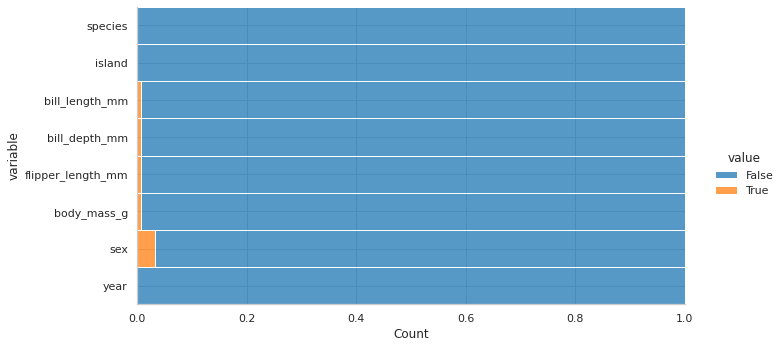

In [8]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2,
            )
            
        )
    )
)

In [9]:
penguins_df = preprocess_penguins_df.dropna()
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


### Preludio: Que estadisticos describen el conjunto de datos?
#### Todas las variables
- Solo las numericas
- Solo categorias -1
- Solo categorias -2
#### Como visualizar los contos
- Pandas
- Seaborn
#### Como visualziar las proporciones

In [10]:
penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


In [11]:
# Configuramos nuestros datos categoricos
penguins_df = (
    penguins_df.astype(
        {
        'species': 'category',
        'island': 'category',
        'sex': 'category'
        })
    )

penguins_df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [12]:
columns = penguins_df.select_dtypes('category').columns

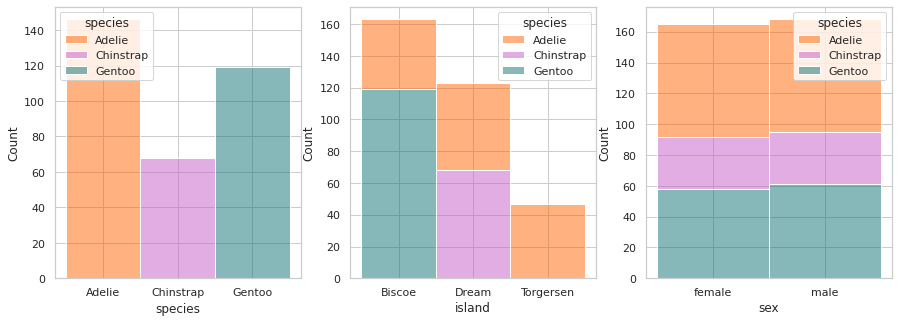

In [13]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i in range(len(columns)):
   sns.histplot(
        ax=ax[i],
        data=penguins_df,
        x=columns[i],
        hue='species',
        multiple='stack',
        palette=penguin_color,
        alpha=0.5,
    )

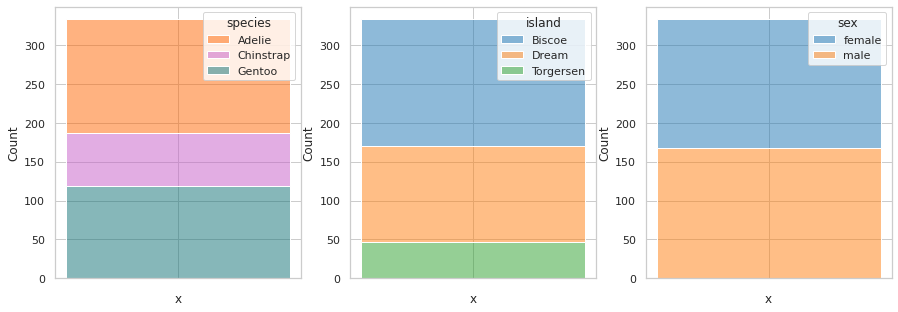

In [14]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i in range(len(columns)):
   sns.histplot(
        ax=ax[i],
        data=penguins_df.add_column('x','').reset_index(),
        x='x',
        multiple='stack',
        hue=columns[i],
        palette=penguin_color if columns[i] == 'species' else None,
        alpha=0.5
    )

# Medidas de tendencia central

In [15]:
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [16]:
penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [17]:
penguins_df.describe(include='category')


,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [18]:
species = penguins_df.species.unique()

adelie_df = penguins_df.query("species == 'Adelie'")
gentoo_df = penguins_df.query("species == 'Gentoo'")
chinstrap_df = penguins_df.query("species == 'Chinstrap'")

list = [adelie_df,gentoo_df,chinstrap_df]
numeric_columns = penguins_df.select_dtypes(include=np.number).columns


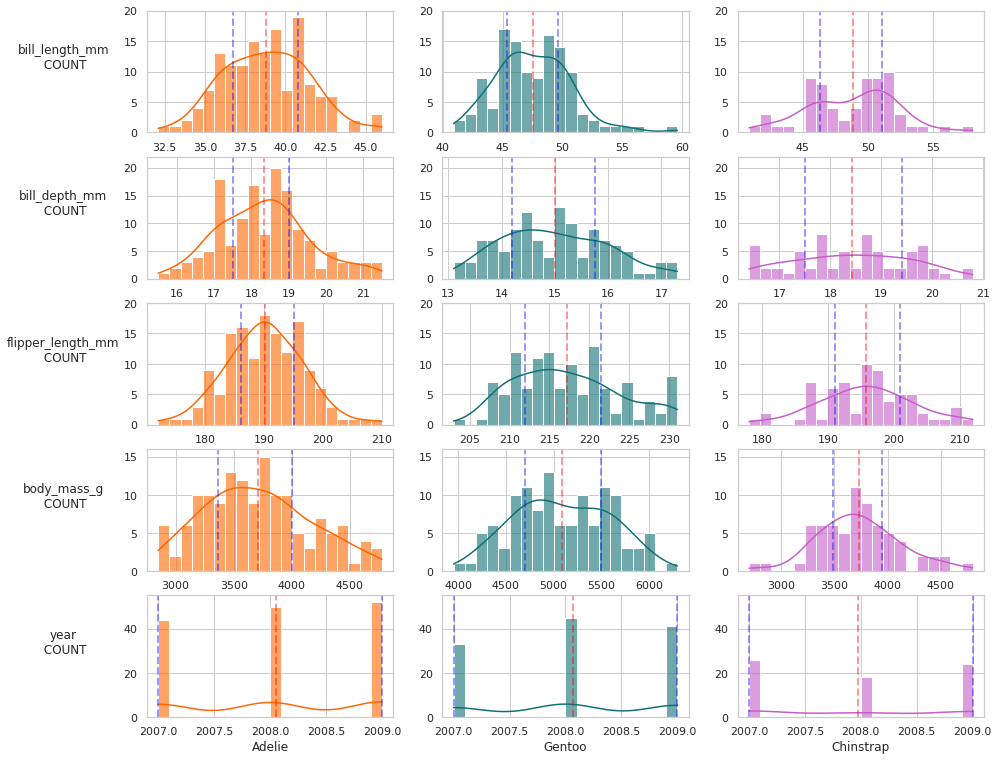

In [82]:
fig,ax = plt.subplots(len(numeric_columns),len(list), figsize=(15,13))
bins = 20
for i in range(len(numeric_columns)):
    for j in range(len(list)):
        sns.histplot( 
            ax=ax[i][j],
            data=list[j],
            x=numeric_columns[i],
            multiple='layer', # {“layer”, “dodge”, “stack”, “fill”}
            stat='count',
            hue='species',
            bins=bins,
            kde=True,
            palette=penguin_color,
            alpha=.6
            )
        
        ax[i][j].axvline(
            x=list[j][numeric_columns[i]].mean(),
            color='red',
            linestyle='dashed',
            linewidth=2,
            alpha=0.4
        )
        ax[i][j].axvline(
            x=list[j][numeric_columns[i]].quantile(.25),
            color='blue',
            linestyle='dashed',
            linewidth=2,
            alpha=0.4
        )
        ax[i][j].axvline(
            x=list[j][numeric_columns[i]].quantile(.75),
            color='blue',
            linestyle='dashed',
            linewidth=2,
            alpha=0.4
        )

        ax[0][0].set_ylim(0,20) ,ax[0][1].set_ylim(0,20) ,ax[0][2].set_ylim(0,20)
        ax[1][0].set_ylim(0,22), ax[1][1].set_ylim(0,22), ax[1][2].set_ylim(0,22)
        ax[2][0].set_ylim(0,20), ax[2][1].set_ylim(0,20), ax[2][2].set_ylim(0,20)
        ax[3][0].set_ylim(0,16), ax[3][1].set_ylim(0,16), ax[3][2].set_ylim(0,16)
        ax[4][0].set_ylim(0,55), ax[4][1].set_ylim(0,55), ax[4][2].set_ylim(0,55)

        ax[i][j].set_ylabel(f'{numeric_columns[i]}\n COUNT', labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel('')
            
        ax[i][j].set_xlabel(f'{species[j]}')
        ax[i][j].get_legend().remove()

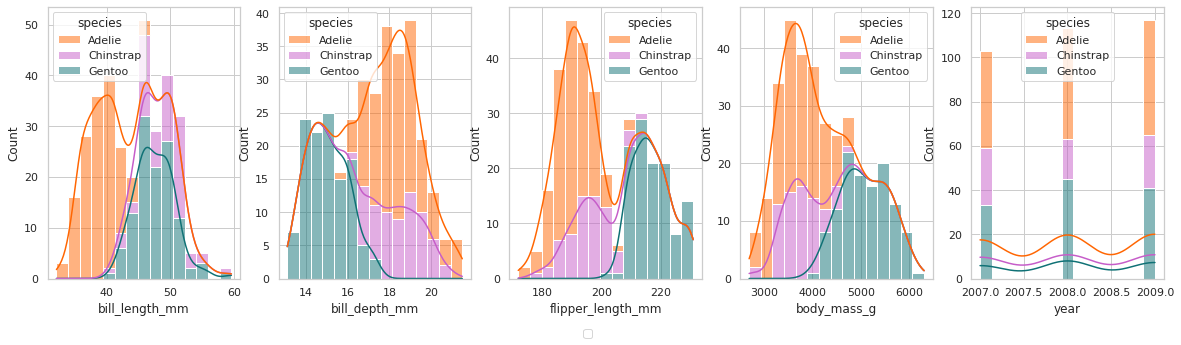

In [97]:
fig,ax = plt.subplots(1,len(numeric_columns), figsize=(20,5))

for i in range(len(numeric_columns)):
    sns.histplot( 
        ax=ax[i],
        data=penguins_df,
        x=numeric_columns[i],
        multiple='stack',
        hue='species',
        bins=15,
        palette=penguin_color,
        kde=True,
        )